In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [ ]:
from keras_unet_collection import models, losses

In [ ]:
from tensorflow import keras
model = keras.models.load_model('test_data/Ieee_unet_collection_att_UNet.hdf5',compile=False)

In [ ]:
import os
def get_paths():
  paths=[os.path.join('test_data/',f)for f in os.listdir('test_data/')]
  return paths
full_file_paths=get_paths()

In [ ]:
full_file_paths.remove('test_data/Ieee_unet_collection_att_UNet.hdf5')

In [ ]:
full_file_paths

['test_data/mosaic_test3.jpg',
 'test_data/mosaic_test23.jpg',
 'test_data/mosaic_test22.jpg',
 'test_data/mosaic_test2.jpg',
 'test_data/mosaic_test20.jpg',
 'test_data/mosaic_test21.jpg',
 'test_data/mosaic_test1.jpg',
 'test_data/mosaic_test19.jpg',
 'test_data/mosaic_test5.jpg',
 'test_data/mosaic_test4.jpg',
 'test_data/mosaic_test18.jpg',
 'test_data/mosaic_test24.jpg',
 'test_data/mosaic_test6.jpg',
 'test_data/mosaic_test7.jpg',
 'test_data/mosaic_test16.jpg',
 'test_data/mosaic_test17.jpg',
 'test_data/mosaic_test9.jpg',
 'test_data/mosaic_test15.jpg',
 'test_data/mosaic_test14.jpg',
 'test_data/mosaic_test8.jpg',
 'test_data/mosaic_test10.jpg',
 'test_data/mosaic_test11.jpg',
 'test_data/mosaic_test13.jpg',
 'test_data/mosaic_test12.jpg',
 'test_data/mosaic_test.jpg']

In [ ]:
just_file_names = []

In [ ]:
for i in full_file_paths:
    just_file_names.append(i[10:-4])
just_file_names

['mosaic_test3',
 'mosaic_test23',
 'mosaic_test22',
 'mosaic_test2',
 'mosaic_test20',
 'mosaic_test21',
 'mosaic_test1',
 'mosaic_test19',
 'mosaic_test5',
 'mosaic_test4',
 'mosaic_test18',
 'mosaic_test24',
 'mosaic_test6',
 'mosaic_test7',
 'mosaic_test16',
 'mosaic_test17',
 'mosaic_test9',
 'mosaic_test15',
 'mosaic_test14',
 'mosaic_test8',
 'mosaic_test10',
 'mosaic_test11',
 'mosaic_test13',
 'mosaic_test12',
 'mosaic_test']

In [ ]:
from PIL import Image

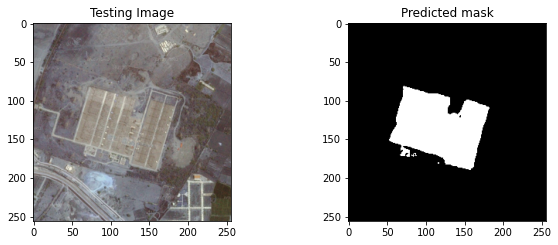

In [ ]:
SIZE = 256

image = cv2.imread('test_data/mosaic_test13.jpg', 1)
image = Image.fromarray(image)
image = image.resize((SIZE, SIZE))


te = np.array(image)/255.
input=np.expand_dims(te, 0)
#input.shape

prediction = (model.predict(input)[0,:,:,0] > 0.5).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(image, cmap='gray')
plt.subplot(232)
plt.title('Predicted mask')
plt.imshow(prediction, cmap='gray')

In [ ]:
def final_mask(i):
    SIZE = 256
    image = cv2.imread(i, 1)
    image = Image.fromarray(image)
    image = image.resize((SIZE, SIZE))


    te = np.array(image)/255.
    input=np.expand_dims(te, 0)
    #input.shape

    prediction = (model.predict(input)[0,:,:,0] > 0.5).astype(np.uint8)
    
    
    dest = "pred_test_images/"+i[10:]
    print(dest)
    cv2.imwrite(dest, prediction)
    
    plt.figure(figsize=(16, 8))
    plt.subplot(231)
    plt.title('Testing Image')
    plt.imshow(image, cmap='gray')
    plt.subplot(232)
    plt.title('Predicted mask')
    plt.imshow(prediction, cmap='gray')

pred_test_images/mosaic_test3.jpg
pred_test_images/mosaic_test23.jpg
pred_test_images/mosaic_test22.jpg
pred_test_images/mosaic_test2.jpg
pred_test_images/mosaic_test20.jpg
pred_test_images/mosaic_test21.jpg
pred_test_images/mosaic_test1.jpg
pred_test_images/mosaic_test19.jpg
pred_test_images/mosaic_test5.jpg
pred_test_images/mosaic_test4.jpg
pred_test_images/mosaic_test18.jpg
pred_test_images/mosaic_test24.jpg
pred_test_images/mosaic_test6.jpg
pred_test_images/mosaic_test7.jpg
pred_test_images/mosaic_test16.jpg
pred_test_images/mosaic_test17.jpg
pred_test_images/mosaic_test9.jpg
pred_test_images/mosaic_test15.jpg
pred_test_images/mosaic_test14.jpg
pred_test_images/mosaic_test8.jpg
pred_test_images/mosaic_test10.jpg


<ipython-input-13-892b1aab8801>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 8))


pred_test_images/mosaic_test11.jpg
pred_test_images/mosaic_test13.jpg
pred_test_images/mosaic_test12.jpg
pred_test_images/mosaic_test.jpg


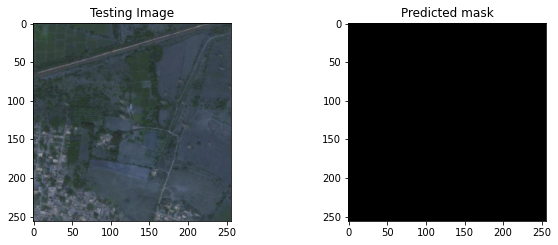

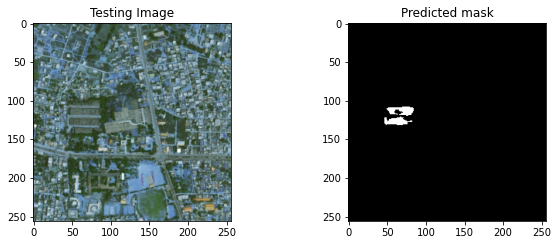

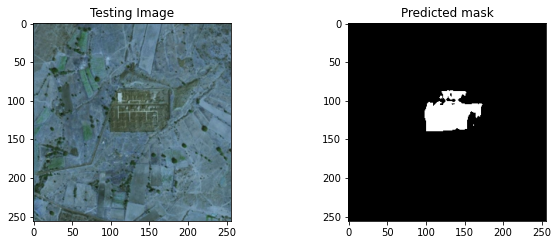

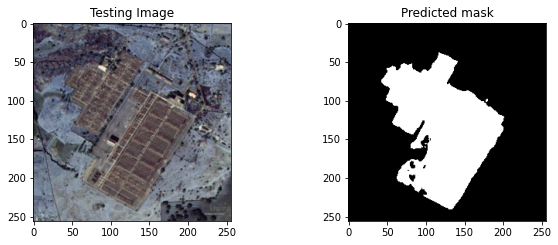

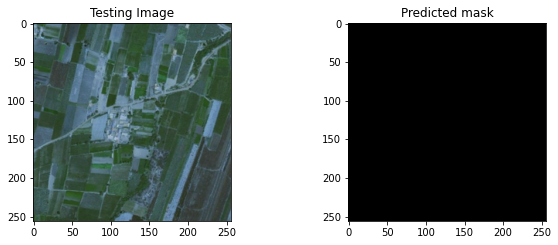

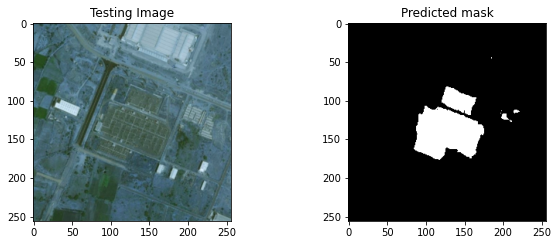

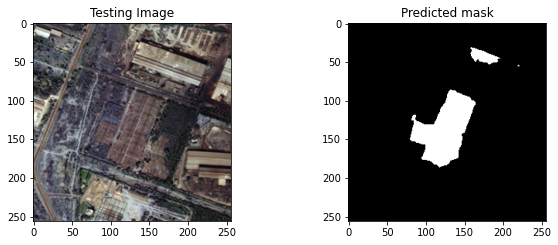

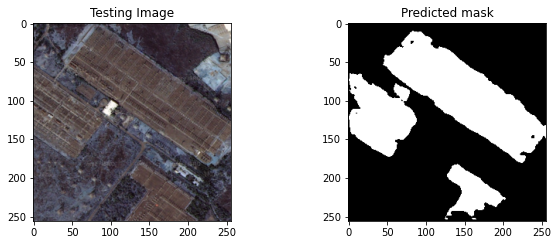

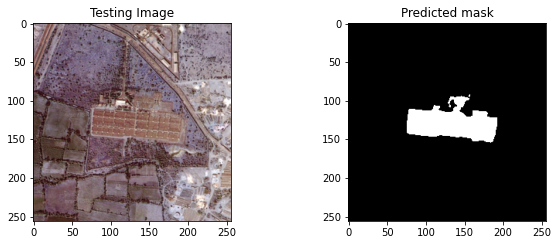

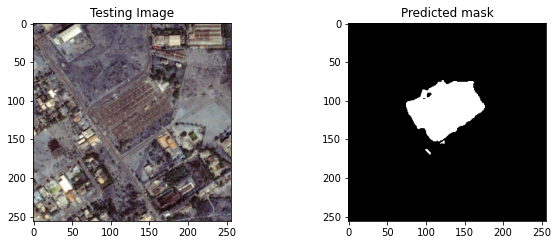

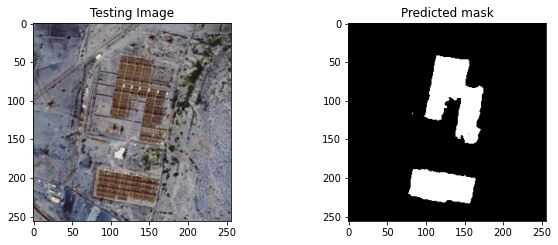

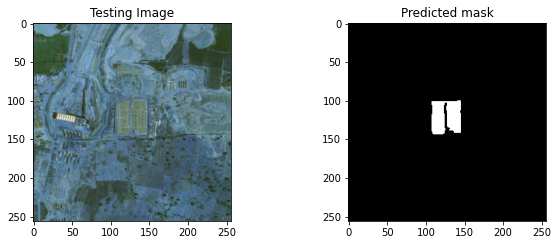

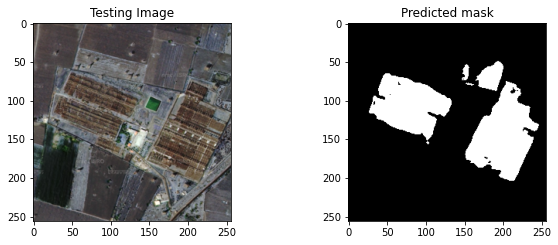

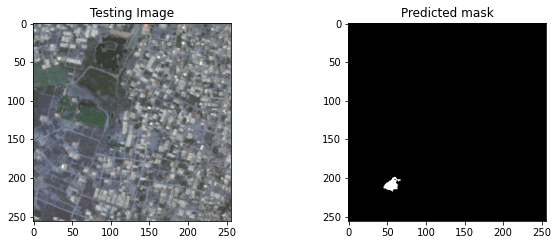

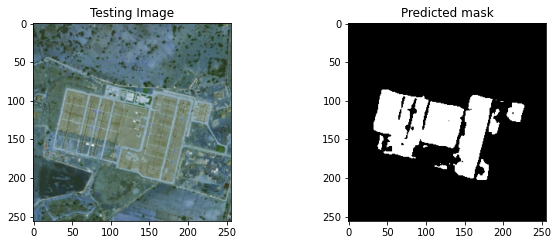

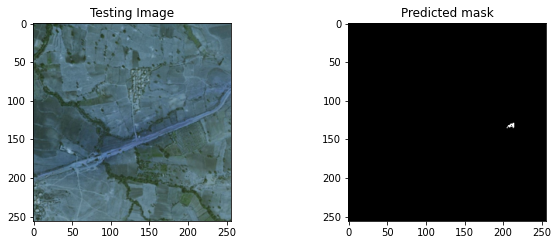

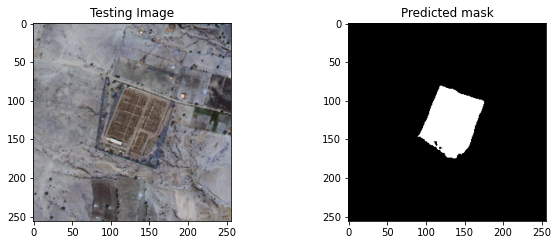

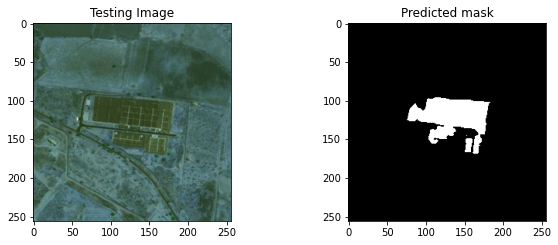

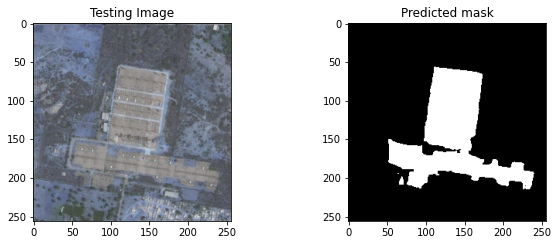

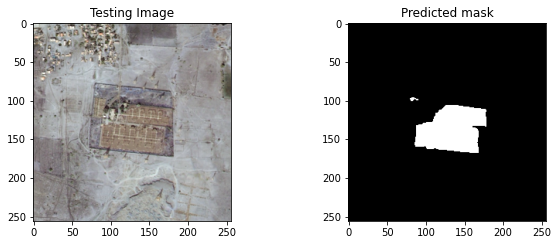

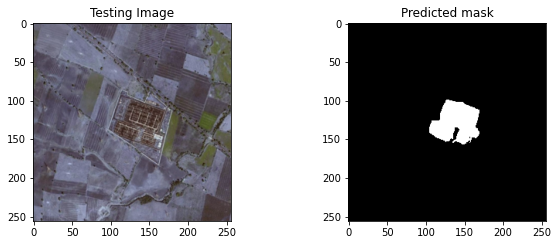

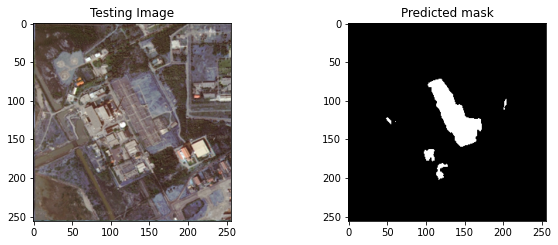

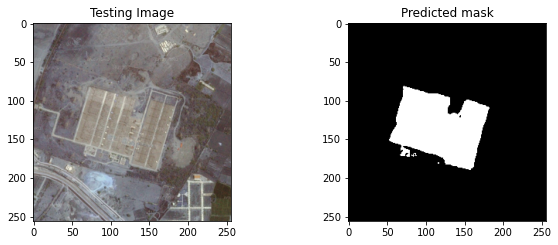

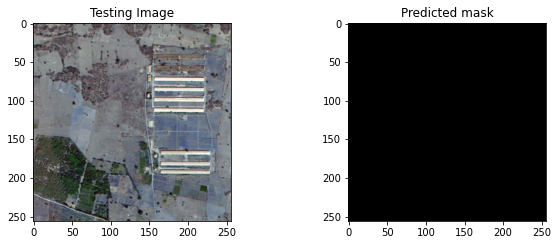

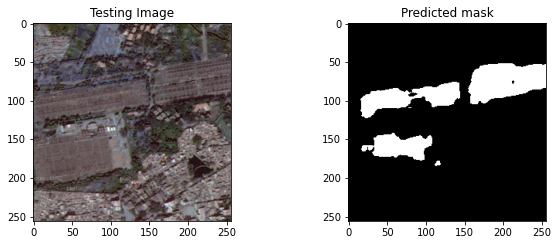

In [ ]:
count=0
for i in full_file_paths:
  final_mask(i)
  count+=1

pred_test_images/mosaic_test23.jpg


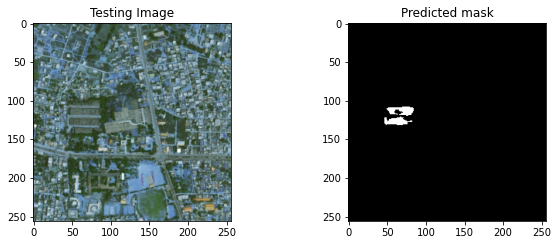

In [ ]:
final_mask(full_file_paths[1])

In [ ]:
def final_mask1(i):
    SIZE = 256
    image = cv2.imread(i, 1)
    image = Image.fromarray(image)
    image = image.resize((SIZE, SIZE))


    te = np.array(image)/255.
    input=np.expand_dims(te, 0)
    #input.shape

    prediction = (model.predict(input)[0,:,:,0] > 0.5).astype(np.uint8)
#     print(prediction)
    
#     dest = "pred_test_images/"+i[10:]
#     print(dest)
#     cv2.imwrite(dest, prediction)

    pred = np.dstack([prediction, prediction, prediction])
    pred = (pred * 255).astype(np.uint8)

    cv2.imwrite('p_test_images/'+i[10:-4]+'.jpg', pred)
    print('p_test_images/'+i[10:-4]+'.jpg')
    plt.figure(figsize=(16, 8))
    plt.subplot(231)
    plt.title('Testing Image')
    plt.imshow(image, cmap='gray')
    plt.subplot(232)
    plt.title('Predicted mask')
    plt.imshow(prediction, cmap='gray')

p_test_images/mosaic_test23.jpg


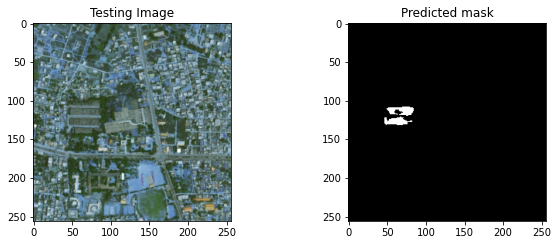

In [ ]:
final_mask1(full_file_paths[1])

p_test_images/mosaic_test3.jpg
p_test_images/mosaic_test23.jpg
p_test_images/mosaic_test22.jpg
p_test_images/mosaic_test2.jpg
p_test_images/mosaic_test20.jpg
p_test_images/mosaic_test21.jpg
p_test_images/mosaic_test1.jpg
p_test_images/mosaic_test19.jpg
p_test_images/mosaic_test5.jpg
p_test_images/mosaic_test4.jpg
p_test_images/mosaic_test18.jpg
p_test_images/mosaic_test24.jpg
p_test_images/mosaic_test6.jpg
p_test_images/mosaic_test7.jpg
p_test_images/mosaic_test16.jpg
p_test_images/mosaic_test17.jpg
p_test_images/mosaic_test9.jpg
p_test_images/mosaic_test15.jpg
p_test_images/mosaic_test14.jpg
p_test_images/mosaic_test8.jpg
p_test_images/mosaic_test10.jpg


<ipython-input-40-f3f223ba1814>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 8))


p_test_images/mosaic_test11.jpg
p_test_images/mosaic_test13.jpg
p_test_images/mosaic_test12.jpg
p_test_images/mosaic_test.jpg


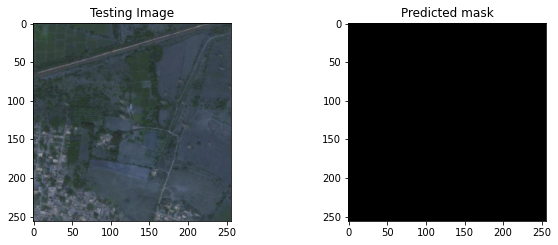

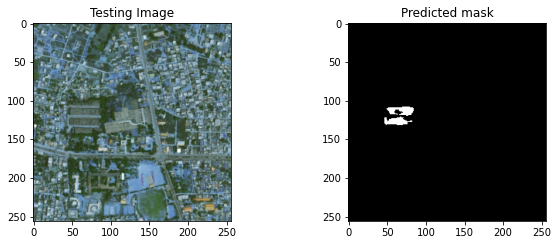

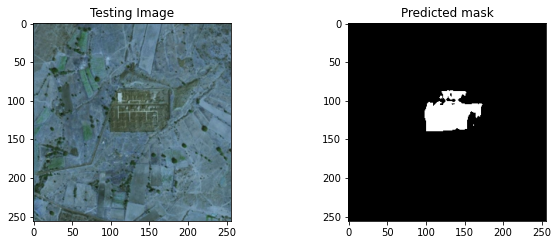

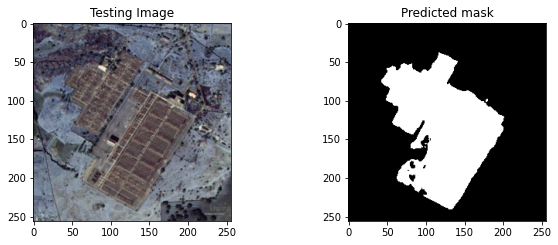

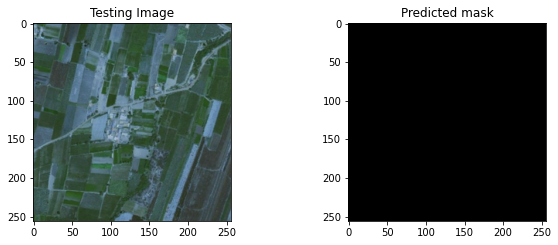

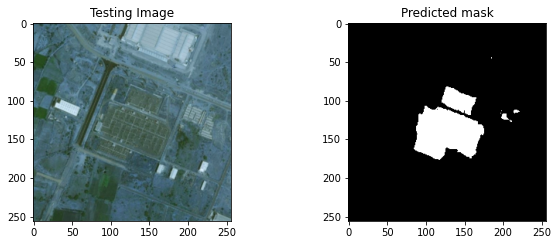

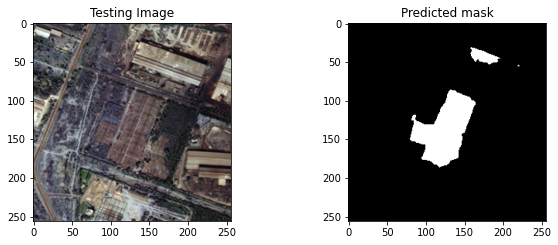

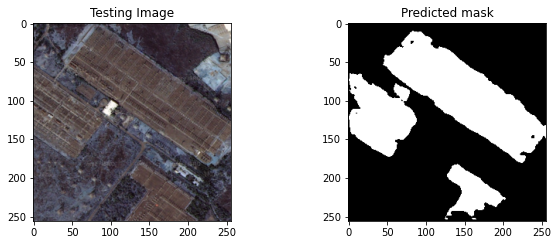

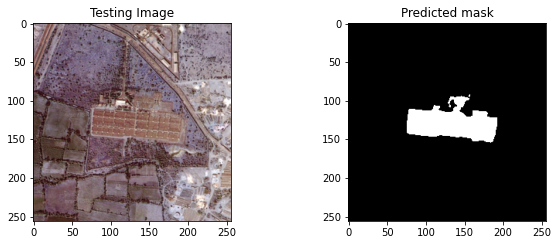

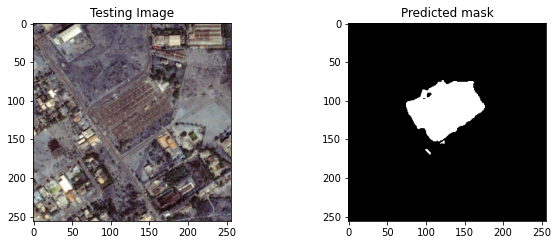

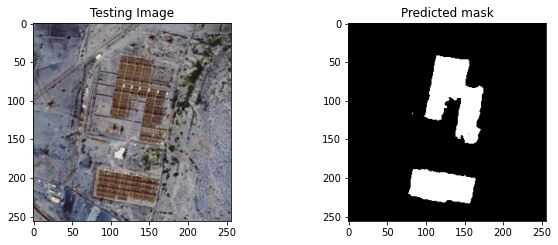

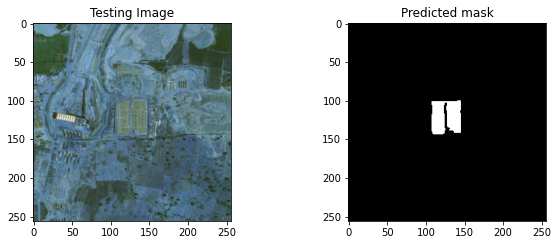

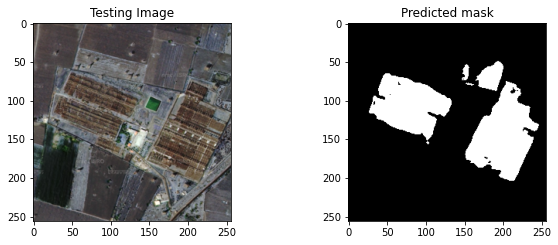

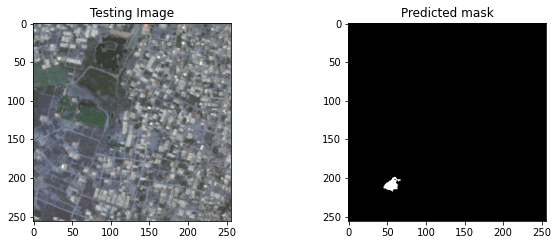

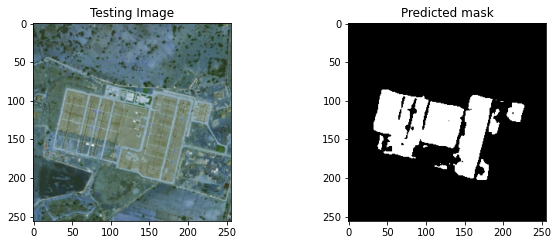

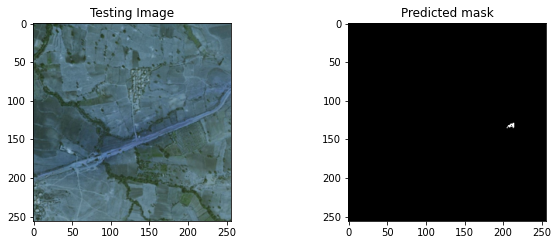

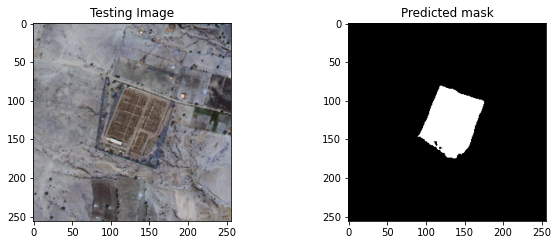

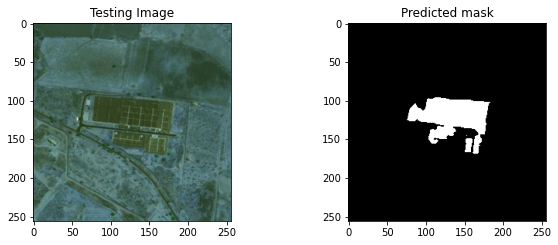

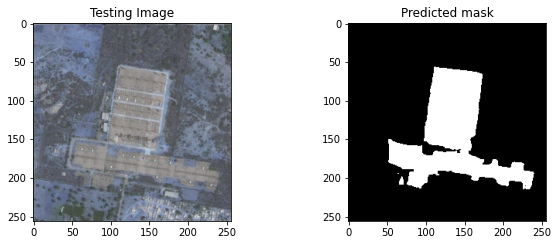

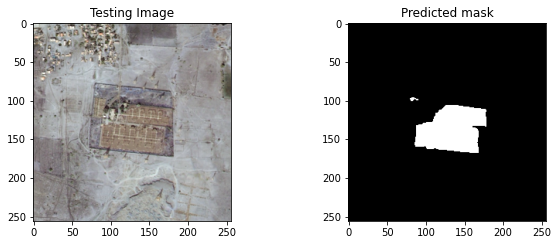

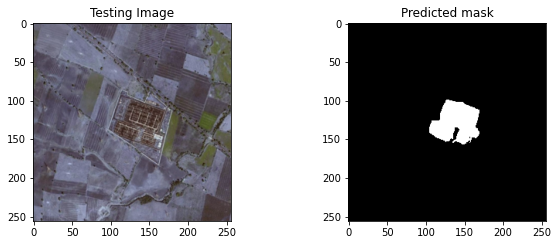

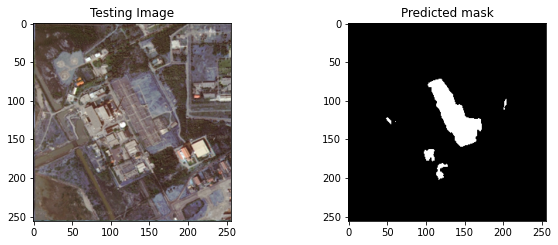

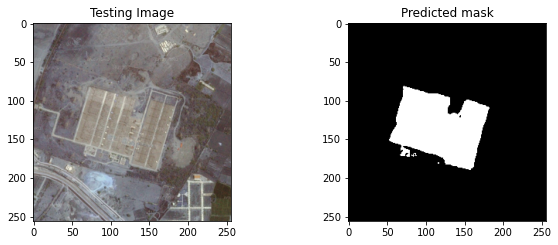

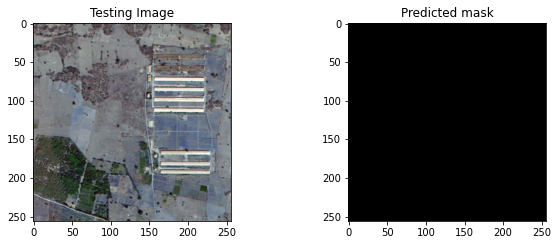

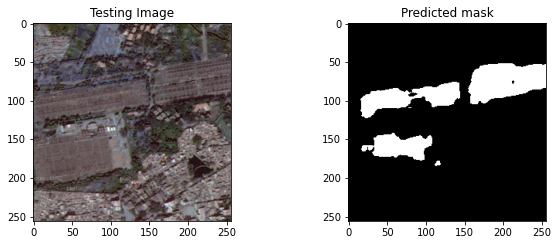

In [ ]:
count=0
for i in full_file_paths:
  final_mask1(i)
  count+=1

In [ ]:
import os, sys
import numpy as np
from PIL import Image
im = Image.open('p_test_images/mosaic_test.jpg')
imgset=np.array(im)
np.save("out_imgds.npy",np.array(imgset))
data = np.load('out_imgds.npy')
print(np.array(data).shape)

(256, 256, 3)


In [ ]:
b = np.load('out_imgds.npy')
print("b is: ")
print(b)

b is: 
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
def npy_file_maker(i):
    im = Image.open('p_test_images/'+i[10:])
    imgset=np.array(im)
    np.save("npy_files/"+i[10:-4]+"_out_imgds.npy",np.array(imgset))
    data = np.load("npy_files/"+i[10:-4]+"_out_imgds.npy")
    print(np.array(data).shape)

In [ ]:
npy_file_maker(full_file_paths[1])

(256, 256, 3)


In [ ]:
b = np.load('npy_files/mosaic_test23_out_imgds.npy')
print("b is: ")
print(b)

b is: 
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
count=0
for i in full_file_paths:
  npy_file_maker(i)
  count+=1

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [ ]:
just_file_names

['mosaic_test3',
 'mosaic_test23',
 'mosaic_test22',
 'mosaic_test2',
 'mosaic_test20',
 'mosaic_test21',
 'mosaic_test1',
 'mosaic_test19',
 'mosaic_test5',
 'mosaic_test4',
 'mosaic_test18',
 'mosaic_test24',
 'mosaic_test6',
 'mosaic_test7',
 'mosaic_test16',
 'mosaic_test17',
 'mosaic_test9',
 'mosaic_test15',
 'mosaic_test14',
 'mosaic_test8',
 'mosaic_test10',
 'mosaic_test11',
 'mosaic_test13',
 'mosaic_test12',
 'mosaic_test']

In [ ]:
def npy_file_maker(i):
    im = Image.open(i)
    imgset=np.array(im)
    np.save("out_imgds.npy",np.array(imgset))
    data = np.load("out_imgds.npy")
    print(np.array(data).shape)

In [ ]:
npy_file_maker("tmpch14e8gh.png")

(3750, 3750, 4)


In [ ]:
im = cv2.imread("tmpch14e8gh.png", cv2.IMREAD_GRAYSCALE)
im.shape

(3750, 3750)

In [ ]:
def npy_file_maker(i):
    im = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    imgset=np.array(im)
    np.save("out_imgds.npy",np.array(imgset))
    data = np.load("out_imgds.npy")
    print(np.array(data).shape)

In [ ]:
npy_file_maker("tmpch14e8gh.png")

(3750, 3750)
